In [1]:
%reset -f
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config Completer.use_jedi = False

In [2]:
import sys
sys.path.insert(0,"..")
from profiler import *
from utils import *

Available workers: 16


In [3]:
dmel1 = WingbeatDatasetProfiler(dsname="Melanogaster_RL/Z", custom_label=[0], distance=100)
dsuz1 = WingbeatDatasetProfiler(dsname="Suzukii_RL/Y", custom_label=[1], distance=100)
dmel2 = WingbeatDatasetProfiler(dsname="Melanogaster_RL/Y", custom_label=[0])
dsuz2 = WingbeatDatasetProfiler(dsname="Suzukii_RL/X", custom_label=[1])

Found 24763 in dataset: Melanogaster_RL/Z, and 1 label(s): ['D. melanogaster']
Label(s) changed to [0]


Creating a pandas Dataframe with file-paths, clean-scores, duration, sums of abs values, indice and labels..
Finished.
Found 25732 in dataset: Suzukii_RL/Y, and 1 label(s): ['D. suzukii']
Label(s) changed to [1]


Creating a pandas Dataframe with file-paths, clean-scores, duration, sums of abs values, indice and labels..
Finished.
Found 29002 in dataset: Melanogaster_RL/Y, and 1 label(s): ['D. melanogaster']
Label(s) changed to [0]


Creating a pandas Dataframe with file-paths, clean-scores, duration, sums of abs values, indice and labels..
Finished.
Found 19657 in dataset: Suzukii_RL/X, and 1 label(s): ['D. suzukii']
Label(s) changed to [1]


Creating a pandas Dataframe with file-paths, clean-scores, duration, sums of abs values, indice and labels..
Finished.


In [4]:
maxpeaks = 15
minpeaks = 1
maxscore = 15
minscore = 2.5
selection = f"peaks>{minpeaks} & peaks<{maxpeaks} & score>{minscore} & score<={maxscore}"

In [5]:
# %matplotlib inline
dfmel1 = dmel1.df.query(selection)
dfmel2 = dmel2.df.query(selection)
dfsuz1 = dsuz1.df.query(selection)
dfsuz2 = dsuz2.df.query(selection)

In [6]:
# dmel1.plot_random_psds(dfmel1.sample(len(dfmel1)), noaxis=False)#.sample(len(df),replace=False), noaxis=False)

In [7]:
# %matplotlib qt
# dmel1.plot_random_wbts(df=dfmel1, noaxis=False)#.sample(len(df),replace=False), noaxis=False)

In [8]:
# dfmel1.peaksxtra.apply(lambda x: x[0]).hist(bins=200)

In [39]:
dfsuz1 = pd.concat([dfsuz1, dfsuz2])
dfsuz1 = dfsuz1[dfsuz1.peaksxtra.apply(lambda x: x[1]<560)]
dfsuz1 = dfsuz1[dfsuz1.peaksxtra.apply(lambda x: x[0]>130)]

dfmel1 = pd.concat([dfmel1,dfmel2])
dfmel1 = dfmel1[dfmel1.peaksxtra.apply(lambda x: x[1]<560)]
dfmel1 = dfmel1[dfmel1.peaksxtra.apply(lambda x: x[0]>130)]

srsmel1 = dfmel1.peaksxtra.apply(lambda x: (x[0],x[1]))
srssuz1 = dfsuz1.peaksxtra.apply(lambda x: (x[0],x[1]))

In [40]:
dfm = pd.DataFrame({"mel1": srsmel1.apply(lambda x: x[0]), "mel2": srsmel1.apply(lambda x: x[1])})
dfm = pd.concat([dfm['mel1'], dfm['mel2']]).reset_index(drop=True)
dfs = pd.DataFrame({"suz1": srssuz1.apply(lambda x: x[0]), "suz2": srssuz1.apply(lambda x: x[1])})
dfs = pd.concat([dfs['suz1'], dfs['suz2']]).sample(len(dfm)).reset_index(drop=True)

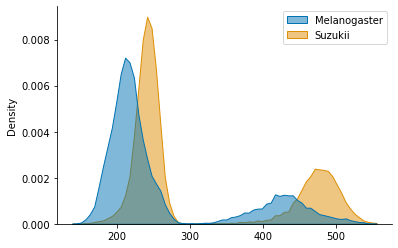

In [43]:
import seaborn as sns

df = pd.concat([dfm,dfs],axis=1); df.columns=['Melanogaster','Suzukii']
sns.histplot(df, stat='density', element='poly', palette=sns.color_palette("colorblind", n_colors=2), bins=70, alpha=.5);
plt.savefig("/home/kalfasyan/Dropbox/kuleuven/paper2_figures/mainwbf.pdf", format='pdf', bbox_inches='tight')

In [38]:
dfm.max()

558

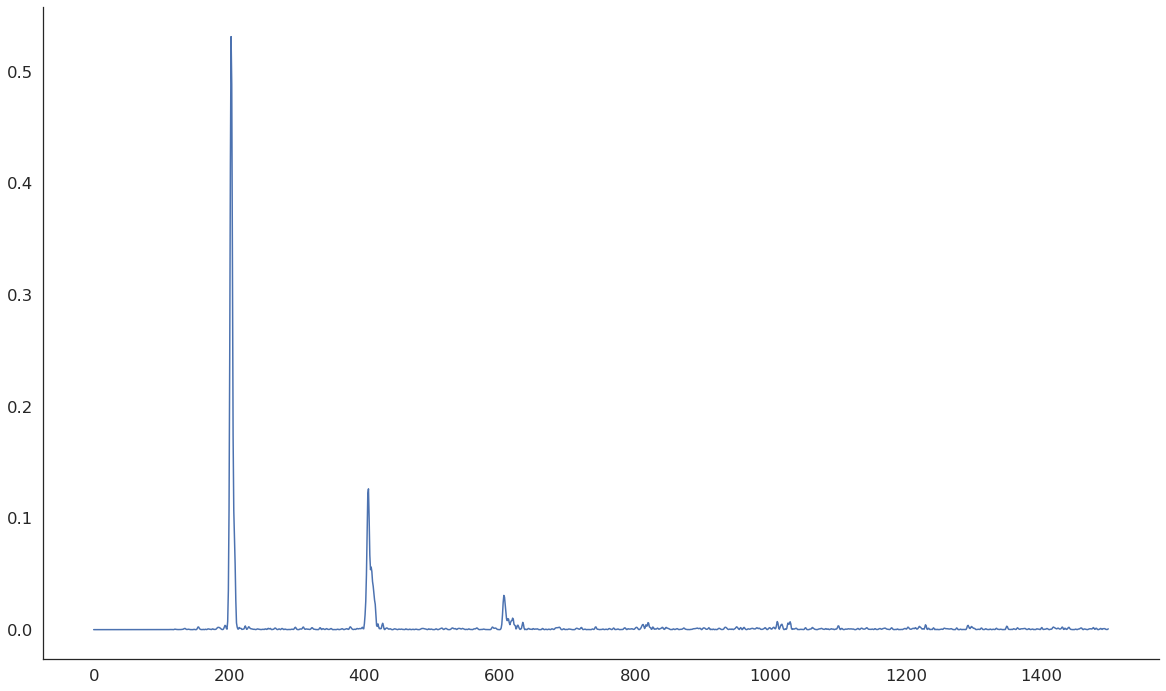

In [67]:
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style("white")
import matplotlib as mpl
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

plt.figure(figsize=(20,12))
plt.plot(dmel1.psds[54][0].T);